In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [69]:
#importing the necessary libraries such as numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
#the required data set is available in sklearn only. Hence the boston housing data is available from sklearn
from sklearn.datasets import load_boston

In [71]:
boston = load_boston()

Let us explore the dataset boston and its features

In [72]:
boston.keys()
# the below shows the details under the dataset. 'data' is the actual data. feature_names are the name of the columns of data.
#target is the dependant variable which is the price of the houses. DESCR gives the details of the dataset. We can access all 
#details under the keys using 'dot' operator

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [34]:
#the boston data has dataset, target, features, description and a filename

In [73]:
#let us check the data. the data is shown in terms of arrays.
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [36]:
boston.feature_names
#these are the names of the columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [37]:
#we can find the information about the data using 'DESCR'
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Important information: The dataset contains 14 attributes. there are 506 instances(rows). there are no missing data. Further information can be gathered by converting the data in to dataframe using pandas.

In [38]:
#convert the data in to pandas dataframe
dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
#all the independant variables/predictors are named as dfx

In [39]:
dfy = pd.DataFrame(boston.target, columns = ['target'])
#the dependant variable/outcome is the target and it is named as dfy

In [40]:
dfcombine = dfx.join(dfy)
#both the dataframes are combined and named as dfcombine

In [41]:
#let us view and examine the head of the combined dataframe
dfcombine.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#Let us check the correlation of the features with each other and with the target

<AxesSubplot:>

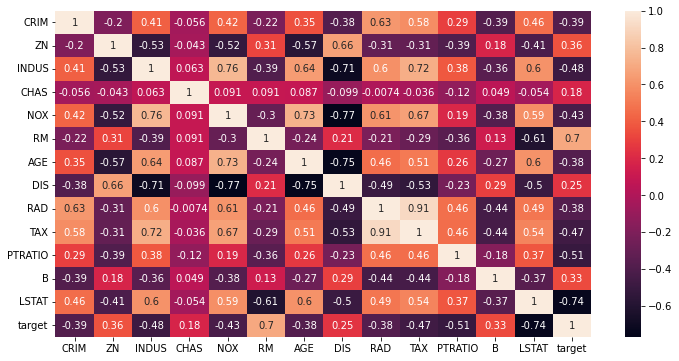

In [42]:
plt.figure(figsize = (12,6))
sns.heatmap(dfcombine.corr(),annot = True)

In [43]:
#the predictor variable such as crime, INDUS-proportion of non retail business across town,  NOX-nitric oxides concentration 
#(parts per 10 million),Age, RAD -index of accessibility to radial highways, tax, PTRATIO - pupil-teacher ratio by town,
# LSTAT -% lower status of the population have a negative correlation on the target. Increase of any of the above variables
#leads to the decrease in the price of the housing

#the predictor variable such as ZN-proportion of residential land zoned for lots over 25,000 sq.ft.
#, RM-average number of rooms per dwelling , DIS - weighted distances to five Boston employment centres ,
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town, all these variables have good posotove correlation
#with the target. increase in any of the bove variables leads to the increase in the price of the house

In [44]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split

In [45]:
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [46]:
#the given problem is a classificaton problem. Hence linear regression is used for ML algorithm
from sklearn.linear_model import LinearRegression

In [47]:
linR = LinearRegression()

In [48]:
linR.fit(X_train, y_train)

LinearRegression()

In [49]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test)

In [50]:
#the accuracy of the prediction is found to be 71% 
linR.score(X_test,y_test)

0.711226005748496

In [51]:
error = y_test - predictions

/home/nuke/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

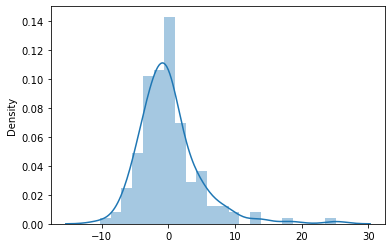

In [52]:
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

In [53]:
dfx.shape

(506, 13)

In [54]:
oness = np.ones((506,1),dtype = int)
dfone = pd.DataFrame(oness, columns = ['ones'])

In [55]:
dfxnew = dfone.join(dfx)

In [56]:
dfxnew.head()

,ones,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
import statsmodels.api as sm

#OrdinaryLeastSquares


In [63]:
lir_ols = sm.OLS(endog= dfy, exog = dfxnew).fit()

In [64]:
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          6.72e-135
Time:                        16:13:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones          36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the statsmodels the p valuue, R value and F-value has been calculated. Considering the p-value 0.05, eliminate features which has p value more than 0.05.  INDUS, AGE are those with high p-values. Which means these features are not significant in affecting the target

In [65]:
dfx2 = dfxnew.drop(['INDUS','AGE'], axis = 1)

In [66]:
lir_ols = sm.OLS(endog= dfy, exog = dfx2).fit()

In [67]:
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          5.54e-137
Time:                        16:13:53   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ones          36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""